# Часть 1: ИССЛЕДОВАНИЕ

1. Общее исследование данных: проверить размеры таблицы, число столбцов, количество пропусков в столбцах (1 балл).
2. Однофакторный анализ: по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной (3 балла).
3. Построить матрицу корреляций (или ее аналог для категориальных признаков): использовать корреляции, тест $χ^2$, ANOVA (2 балла).
4. Провести анализ целевой переменной - на какое распределение больше всего похожа ее гистограмма? Какие проблемы в связи с этим могут возникнуть при обучении моделей? (1 балл)
5. Увеличить размер данных простым дублированием до `1_000_000` строк в датасете. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете по параметрам:
* загрузка данных (1 балл)
* фильтрация данных (1 балл)
* агрегация данных (1 балл)

In [63]:
import warnings

# Игнорирование FutureWarning и UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
ABALONE_DATASET = "https://github.com/aiedu-courses/eda_and_dev_tools/blob/main/datasets/abalone.csv"

<h1> Datasets Descriptions Abalone</h1>
<h2>Predict the age of abalone from physical measurements</h2>

`Sex` - nominal - M, F, and I (infant)

`Length` - continuous - mm - Longest shell measurement

`Diameter` - continuous - mm - perpendicular to length

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried

`Rings` - integer - +1.5 gives the age in years (target)

[Link](https://archive.ics.uci.edu/dataset/1/abalone) to the description of the original dataset.

In [66]:
from pathlib import Path
df = pd.read_csv("https://github.com/aiedu-courses/eda_and_dev_tools/raw/main/datasets/abalone.csv")

<h2>1. Общее исследование данных</h2>

In [67]:
#проверка на наличие ошибочных столбцов в sex
df['Sex'].unique()

array(['M', 'F', 'I', 'f'], dtype=object)

In [68]:
#изменяем ошибочный столбец f на F
df['Sex'] = df['Sex'].replace('f', 'F')

In [69]:
#меняем тип столбца sex, тк он категоральный
df['Sex'] = df['Sex'].astype('category')

In [70]:
#размерность
df.shape

(4177, 9)

In [71]:
#подробная информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4078 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4078 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4127 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [72]:
#полезные значения числовых типов
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [73]:
# # Функция для вычисления выбросов
# def calculate_outliers(series):
#     Q1 = series.quantile(0.25)
#     Q3 = series.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = series[(series < lower_bound) | (series > upper_bound)]
#     return outliers

# # Словарь для хранения выбросов
# outliers_dict = {}

# # Вычисляем выбросы для каждого числового столбца
# for column in numeric_columns:
#     outliers = calculate_outliers(df[column])
#     outliers_dict[column] = outliers

# # Выводим результаты
# for column, outliers in outliers_dict.items():
#     print(f'Выбросы для {column}:')
#     print(outliers)
#     print()

In [74]:
#полезные значения категоральных типов
df.describe(include='category')

,Sex
count,4177
unique,3
top,F
freq,1454


In [75]:
#поиск дупликатов
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


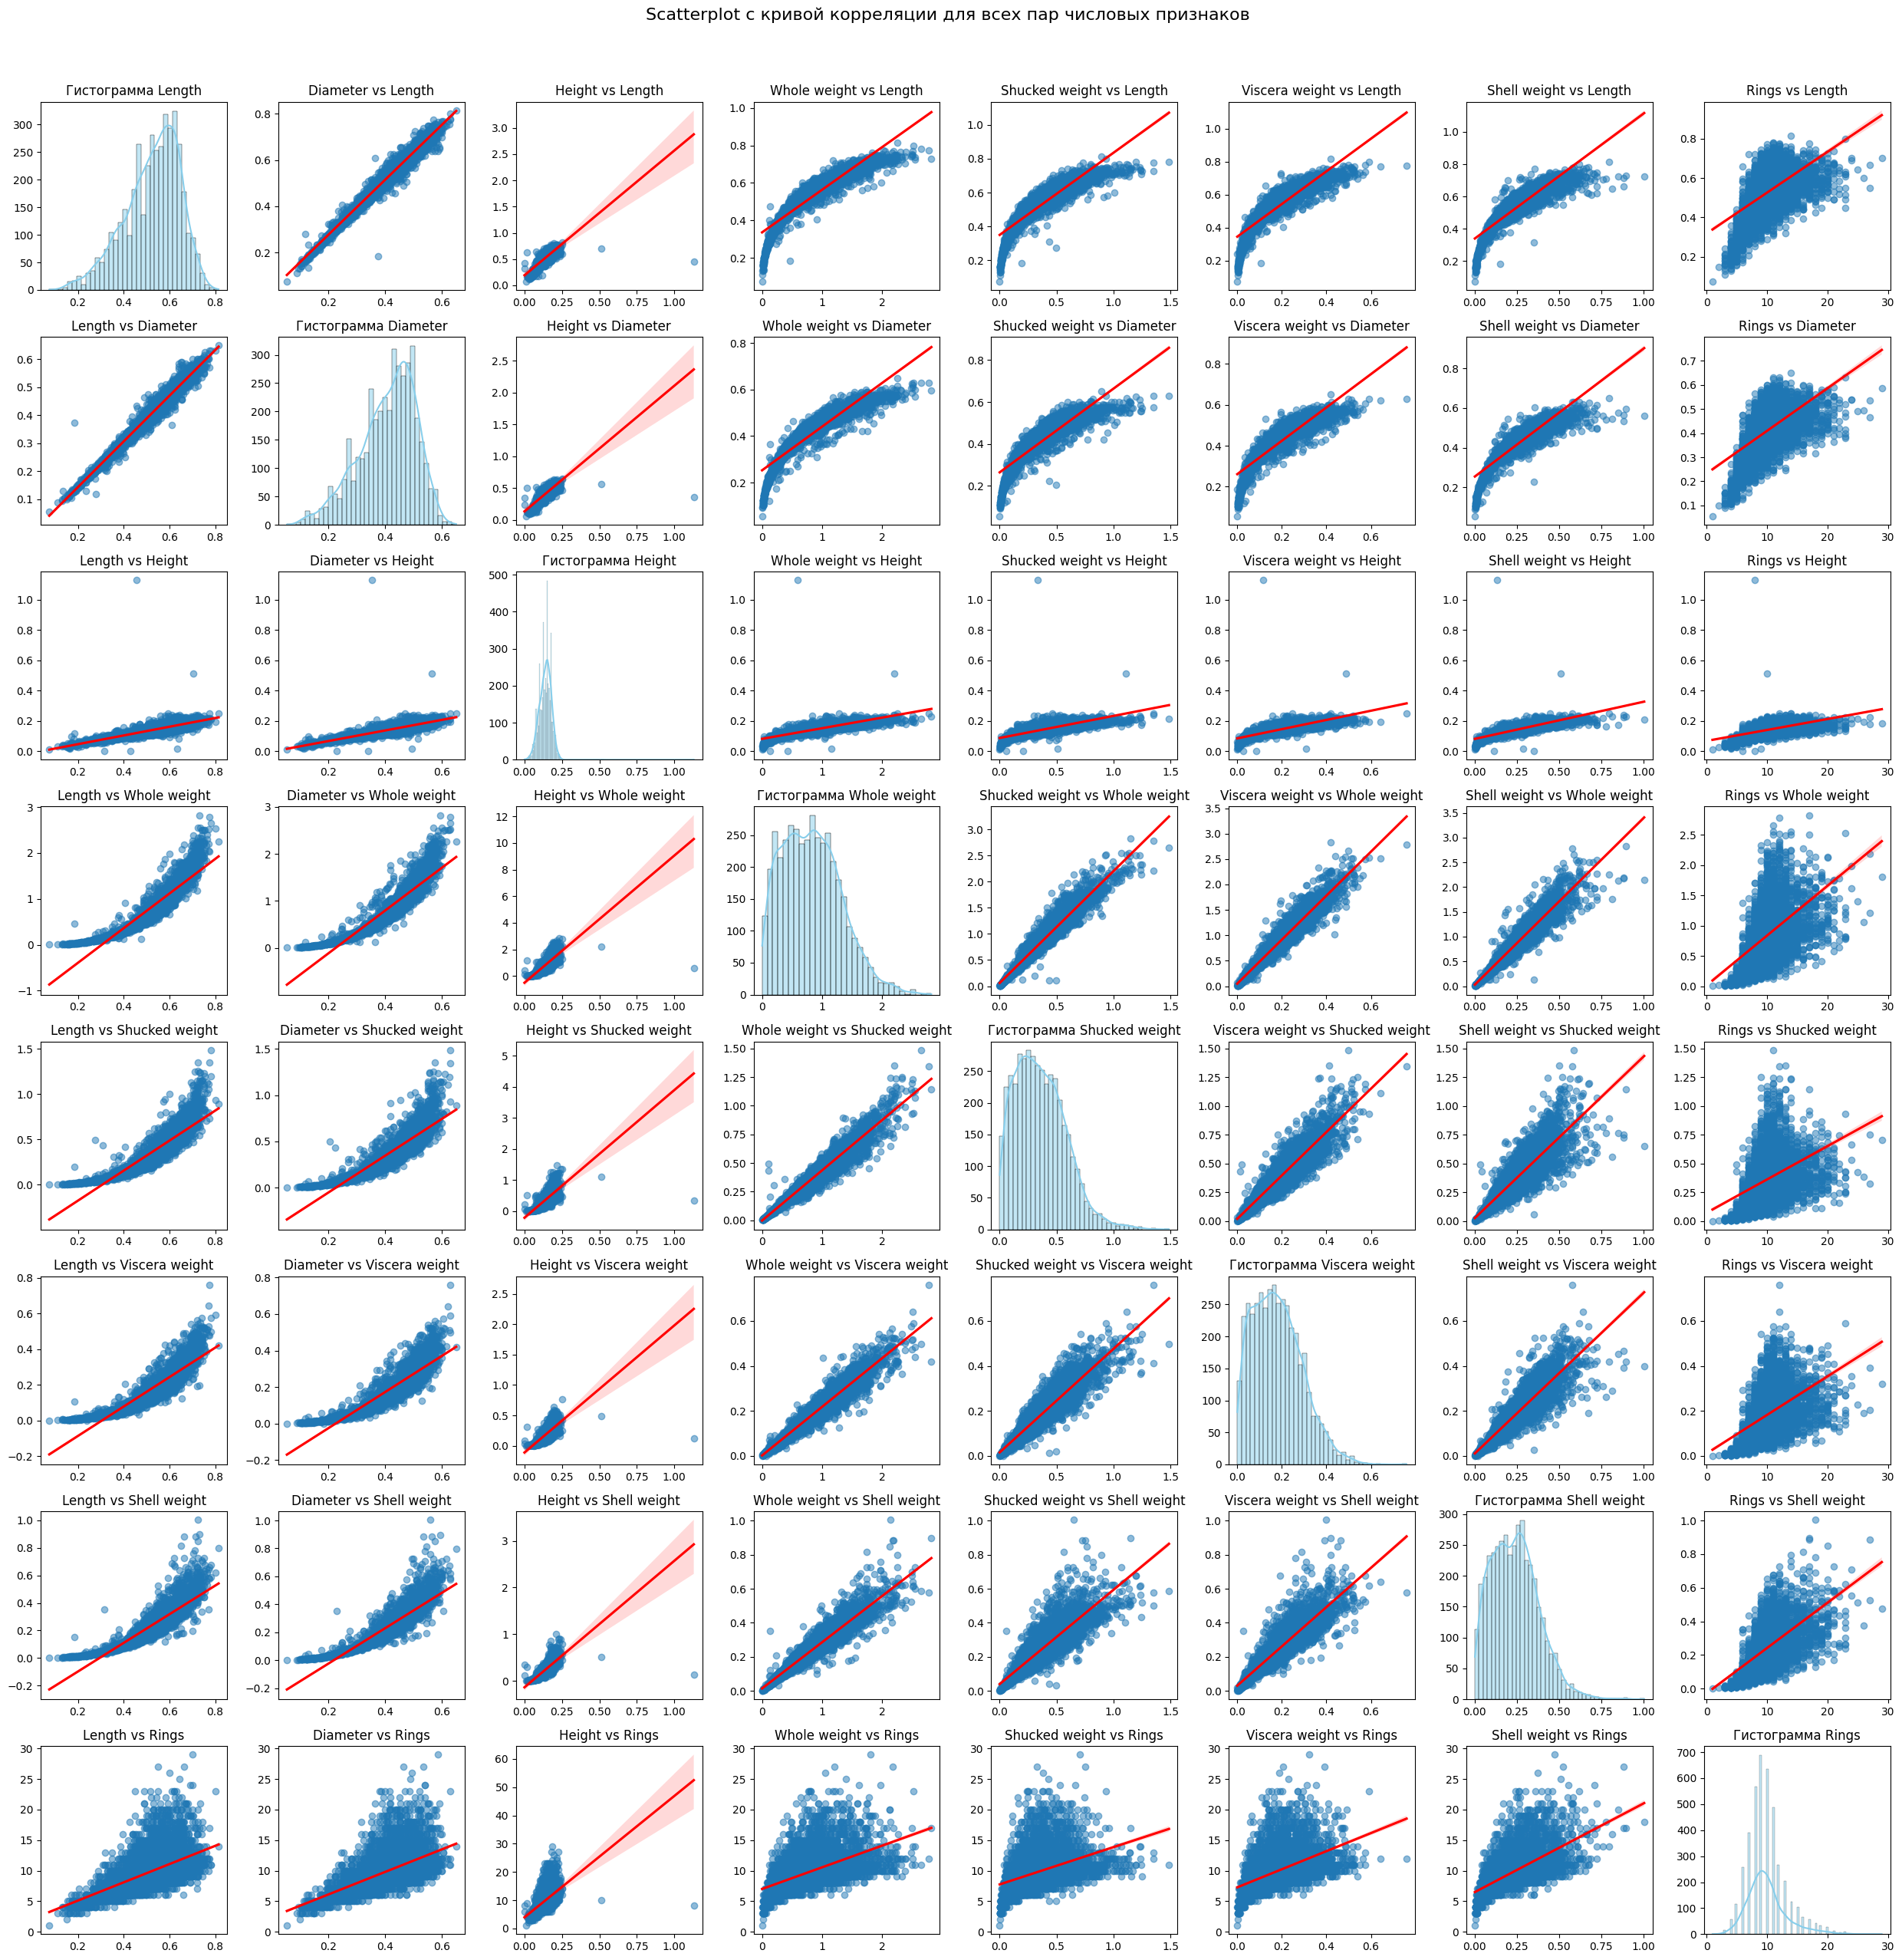

In [76]:
# Выбор числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

# Определение размеров сетки
rows = num_cols
cols = num_cols

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, cols, figsize=(25, 25))
fig.suptitle('Scatterplot с кривой корреляции для всех пар числовых признаков', y=1.02, fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Построение scatterplot с линией корреляции
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        ax = axes[i, j]
        if i == j:
            # Диагональ - гистограмма для каждого признака
            sns.histplot(df[col1], ax=ax, kde=True, color='skyblue')
            ax.set_title(f'Гистограмма {col1}')
        else:
            # Scatterplot с линией регрессии
            sns.regplot(x=df[col2], y=df[col1], ax=ax, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
            ax.set_title(f'{col2} vs {col1}')
        ax.set_xlabel('')
        ax.set_ylabel('')

# Улучшение компоновки
plt.tight_layout()
plt.show()

## Вывод по scatterplot с кривой корреляции для всех пар числовых признаков
* 60% имеют линейную зависимость
* 20% - квадратичную
* оставшиеся - околоквадратичную

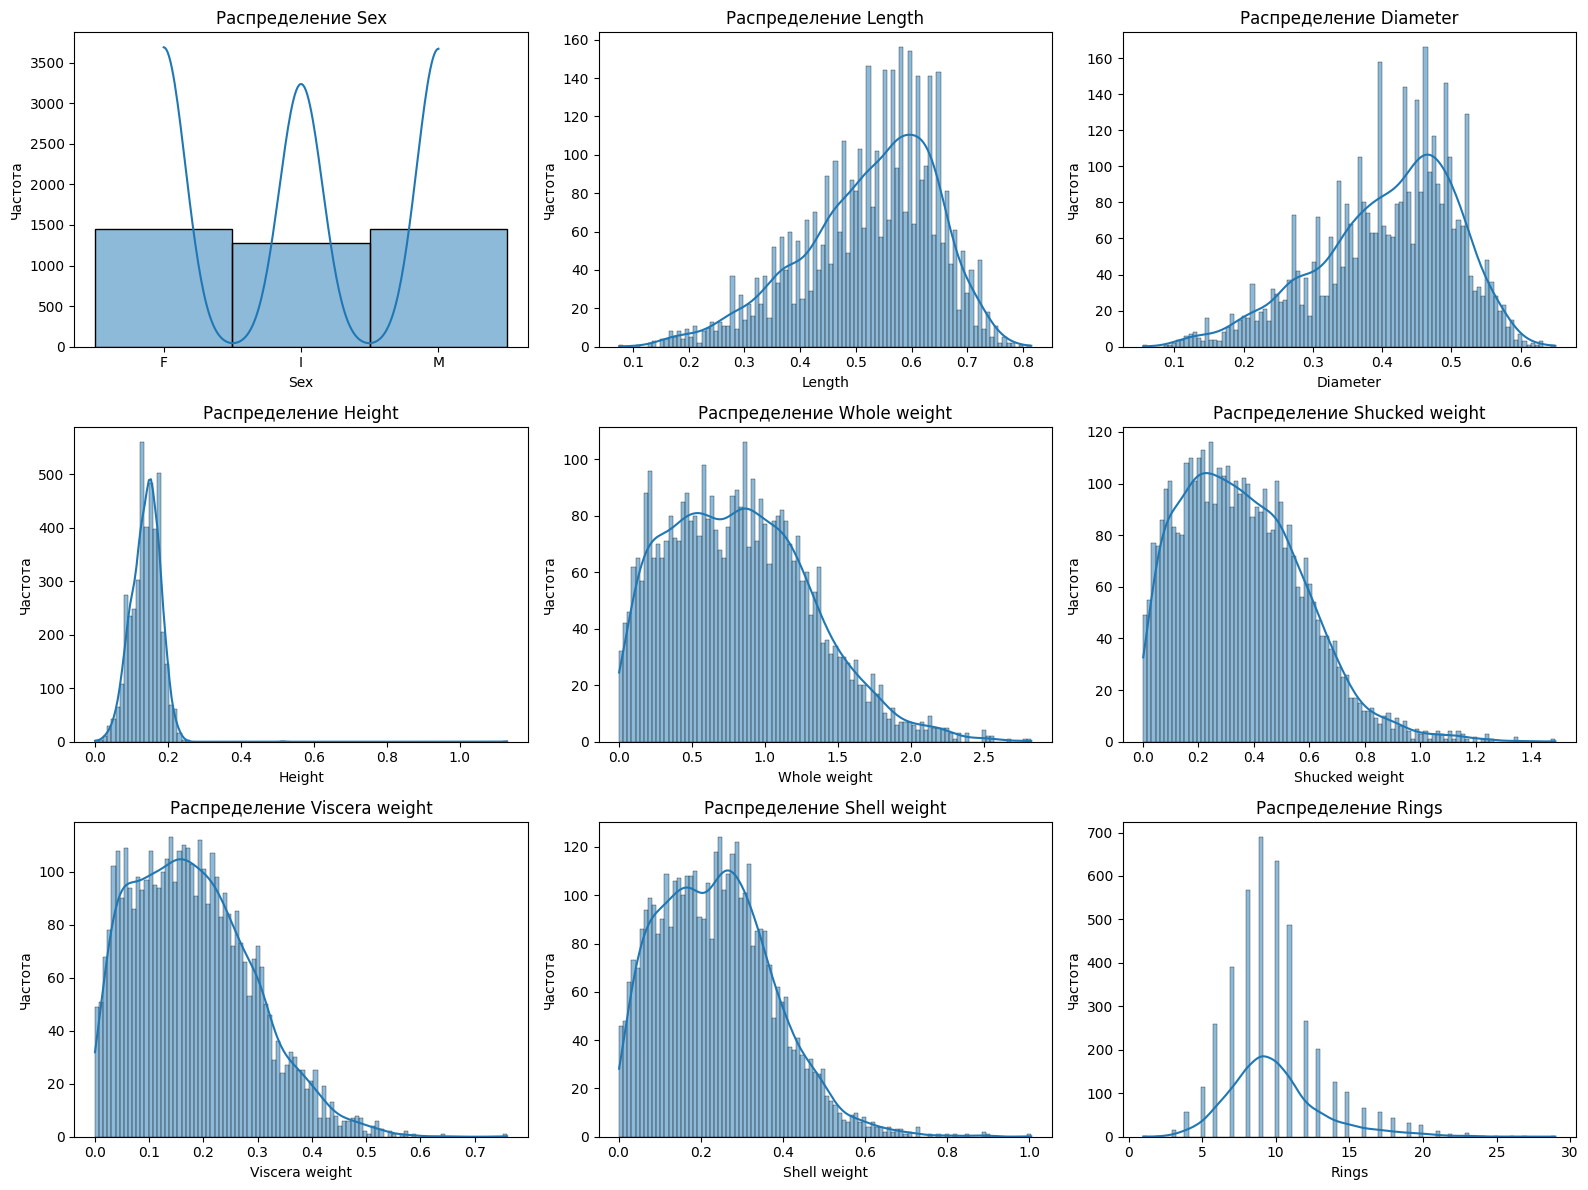

In [77]:
#постоим гистограмму с плотностью распределения для каждого столбца

# for cols in df:
#     plt.figure(figsize=(4,3))
#     sns.histplot(df[cols], bins=100, kde=True);
#     plt.xlabel(cols)


# Количество столбцов для визуализации
columns = df.columns
num_cols = len(columns)

# Определение размеров сетки
rows = (num_cols + 2) // 3  # Вычисляем количество строк (3 графика в строке)

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 4))
axes = axes.flatten()  # Разворачиваем массив подграфиков в 1D для итерации

# Построение графиков
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=100, kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

# Удаление пустых подграфиков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Автоматическая подгонка макета
plt.show()

# Вывод по графикам распределений
* 50% имеют нормальное распределение
* 40 % - логнормальное
* остальное - равномерное

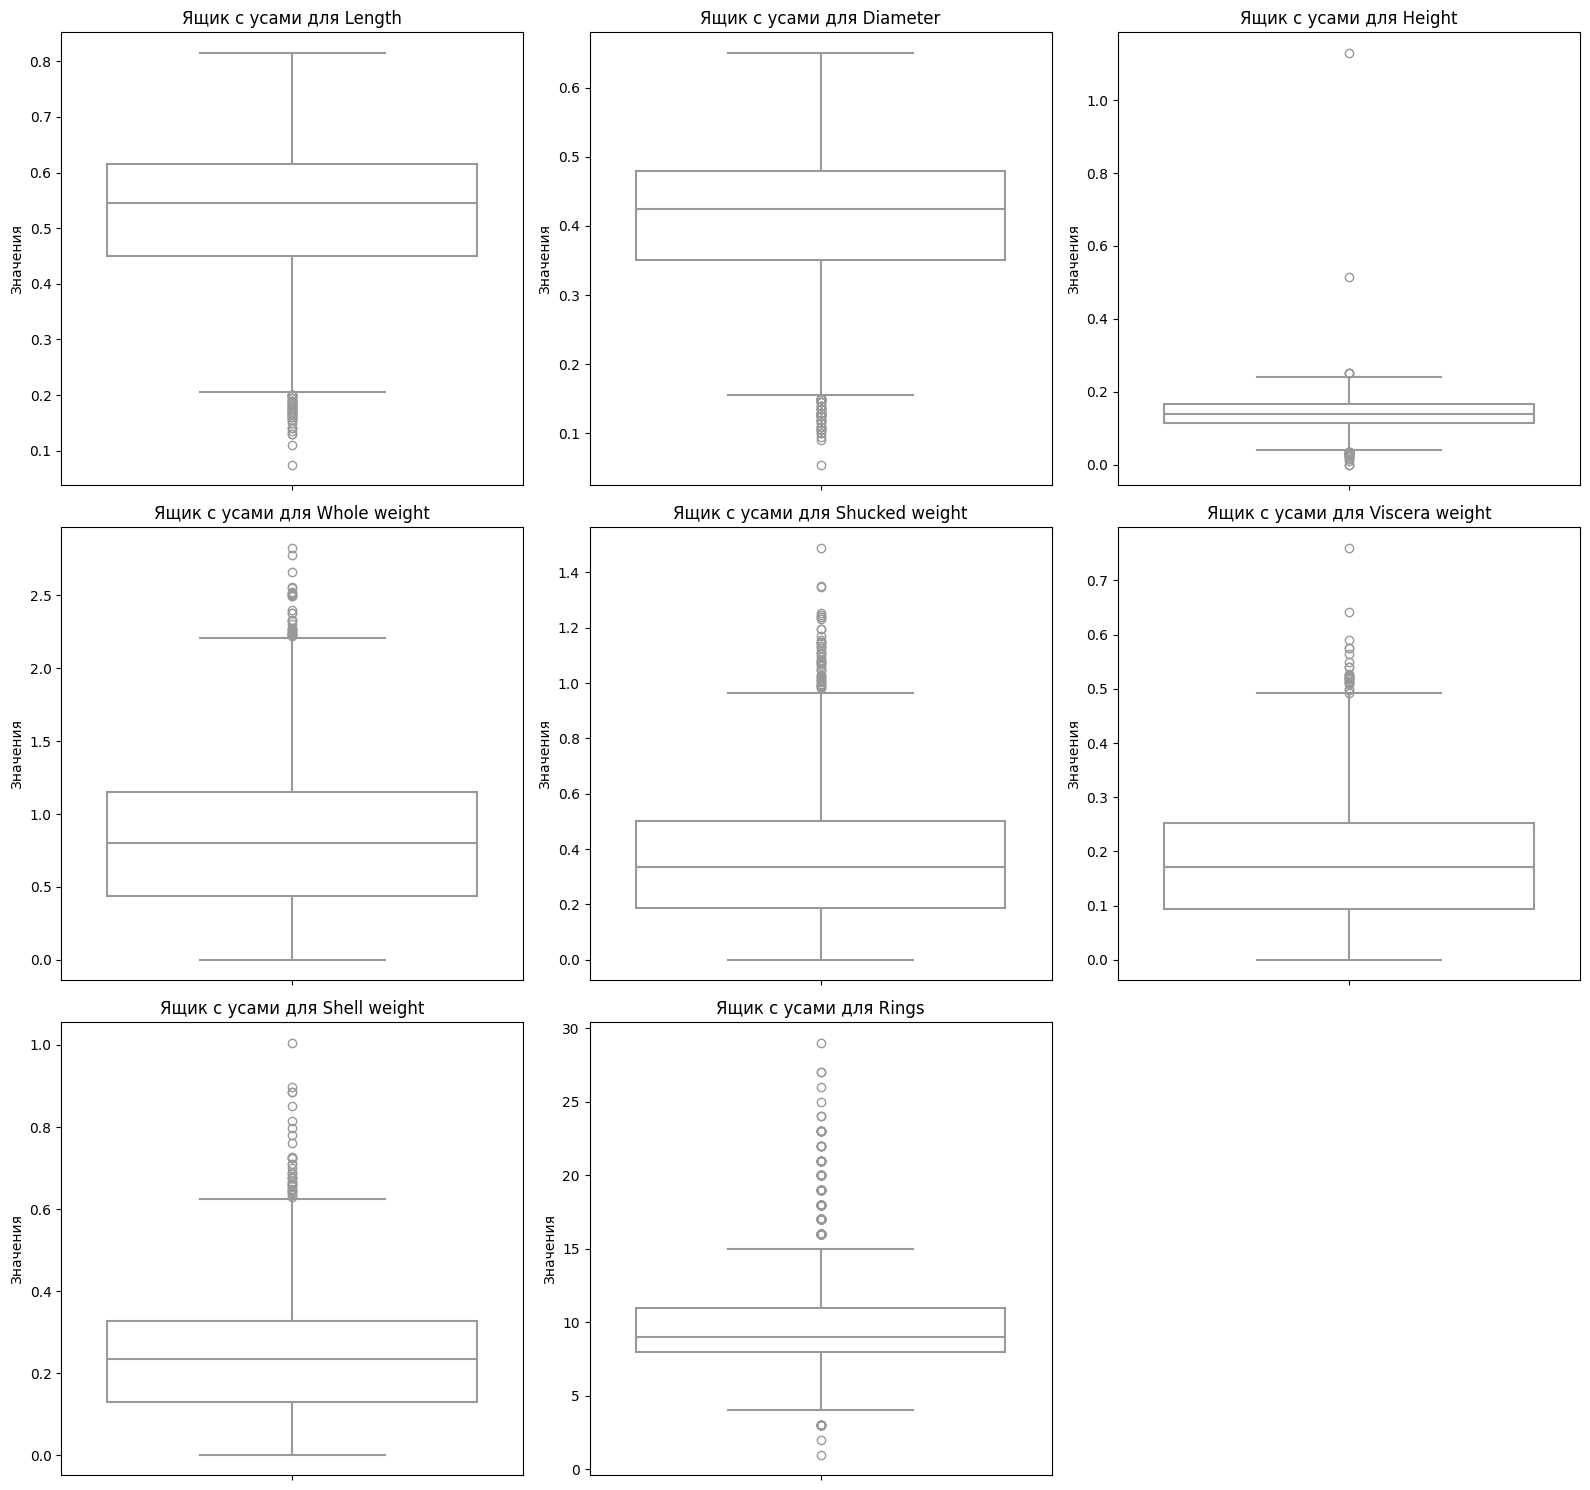

In [78]:
# Построение ящика с усами для каждого числового признака отдельно

# numeric_columns = df.select_dtypes(include=['number']).columns
# for column in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     df.boxplot(column=column)
#     plt.title(f'Ящик с усами для {column}')
#     plt.ylabel('Значения')
#     plt.grid(axis='y')
#     plt.show()

# Выбор числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns

# Определение размеров сетки
num_cols = len(numeric_columns)
rows = (num_cols + 2) // 3  # Количество строк (3 графика на строку)

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 5))
axes = axes.flatten()

# Построение boxplot для каждого числового признака без заливки
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], color='white', linewidth=1.5)
    axes[i].set_title(f'Ящик с усами для {column}')
    axes[i].set_ylabel('Значения')

# Удаление лишних осей
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Улучшение компоновки графиков
plt.tight_layout()
plt.show()

# Вывод по ящику с усами
| Столбец | Кол-во выбросов |
| --- | --- |
| Length | 49 |
| Diameter | 58 |
| Height | 29 |
| Whole weight | 29 |
| Shucked weight | 48 |
| Viscera weight | 26 |
| Shell weight | 35 |
| Rings | 278 |

Столбец 'Length': 49 значений вынесено в хвосты.
Столбец 'Diameter': 58 значений вынесено в хвосты.
Столбец 'Height': 29 значений вынесено в хвосты.
Столбец 'Whole weight': 29 значений вынесено в хвосты.
Столбец 'Shucked weight': 48 значений вынесено в хвосты.
Столбец 'Viscera weight': 26 значений вынесено в хвосты.
Столбец 'Shell weight': 35 значений вынесено в хвосты.
Столбец 'Rings': 278 значений вынесено в хвосты.


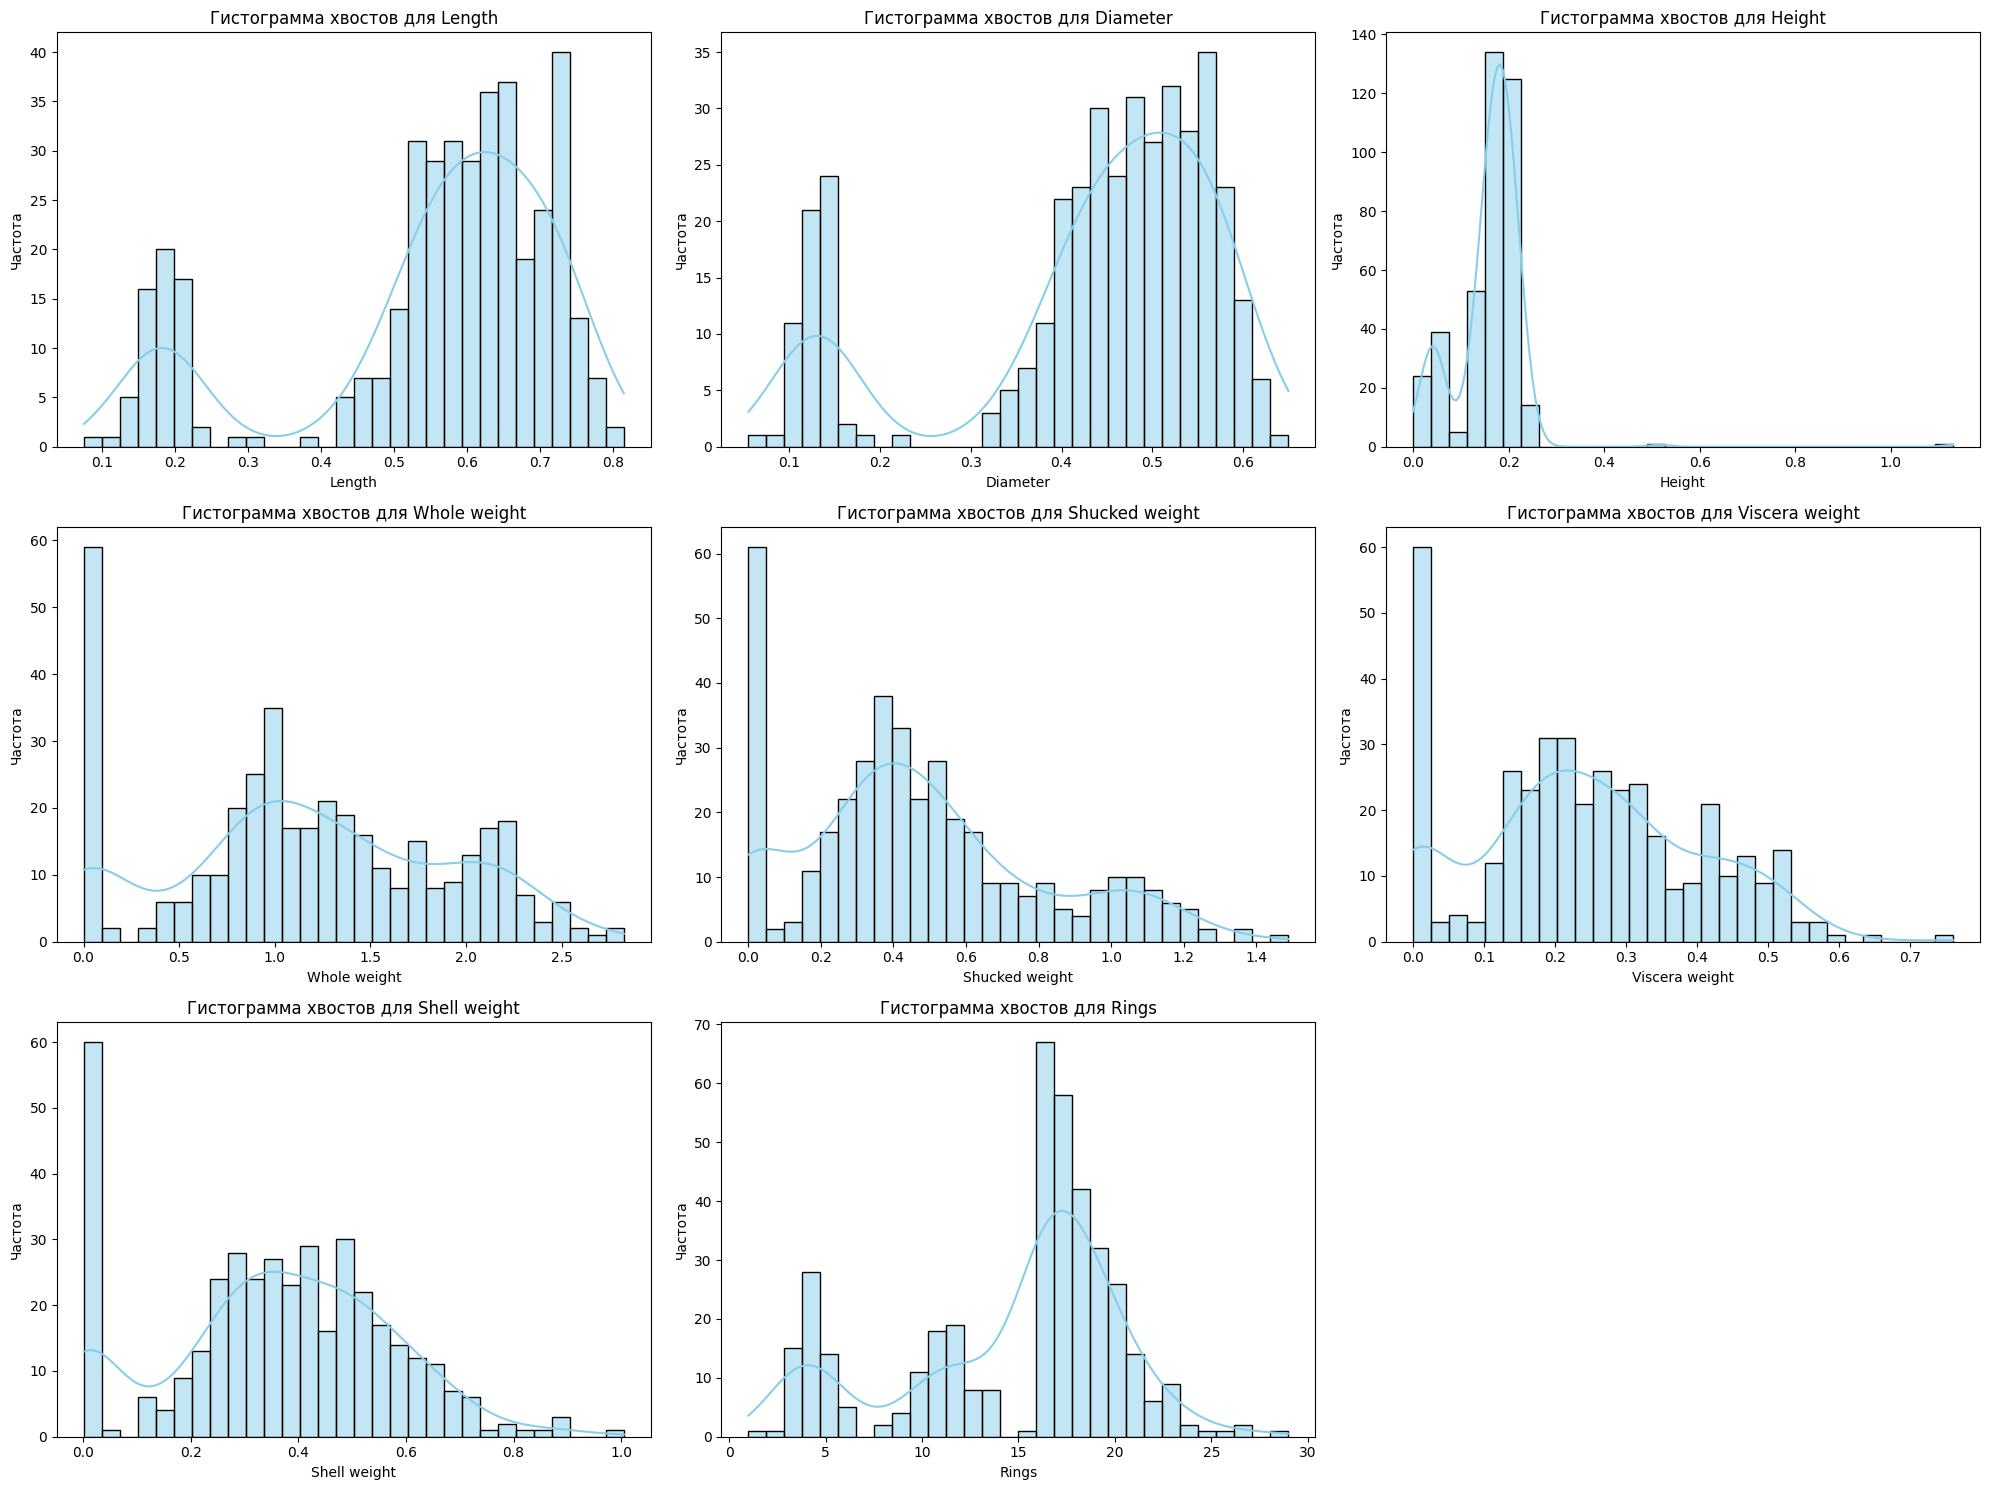

In [79]:
# Выбор всех числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns

# Создаем пустой DataFrame для хранения хвостов
tails_df = pd.DataFrame()

# Вынос хвостов на основе IQR для всех числовых признаков
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # 25-й процентиль
    Q3 = df[col].quantile(0.75)  # 75-й процентиль
    IQR = Q3 - Q1  # Межквартильный размах

    lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
    upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

    # Фильтруем хвосты
    tail_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Добавляем хвосты в отдельный DataFrame
    tails_df = pd.concat([tails_df, tail_rows])

    print(f"Столбец '{col}': {len(tail_rows)} значений вынесено в хвосты.")

# Удаляем дубликаты строк, если одна строка попала в хвосты для нескольких столбцов
tails_df = tails_df.drop_duplicates()

# Построение гистограмм для всех числовых признаков с выбросами
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i + 1)
    sns.histplot(tails_df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма хвостов для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()



# Выводы по гистограммам хвостов:
## Length
>1. Наблюдаются выбросы с обеих сторон распределения.
>2. Хвосты справа более протяженные, что указывает на асимметричность данных.
## Diameter
>1. Выбросы распределены в основном в верхней части.
>2. Данные близки к нормальному распределению, но правый хвост выделяется сильнее.
## Height
>1. Присутствуют выбросы в правом хвосте.
>2. Большинство значений сосредоточено в нижней части, распределение сильно скошено вправо.
## Whole weight
>1. Значительная часть выбросов находится в верхнем диапазоне.
>2. Распределение имеет длинный правый хвост, что указывает на тяжелую правую сторону.
## Shucked weight
>1. Наблюдается асимметрия и выбросы как в начале, так и в правом хвосте.
>2. Данные содержат значительное количество точек на верхнем конце распределения.
## Viscera weight
>1. Распределение показывает наличие выбросов справа.
>2. Асимметрия в данных смещена в правую сторону, где значения более редкие.
## Shell weight
>1. Аналогично другим весовым признакам, есть длинный правый хвост с выбросами.
>2. Основные значения сконцентрированы в нижней половине распределения.
## Rings
>1. Значительное количество выбросов наблюдается в верхней части.
>2. Хвосты длинные и асимметричные, что указывает на разброс значений и возможное влияние редких случаев на метрику.

In [80]:
tails_df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
148,I,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5
149,I,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,F,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3


<h2>2. Однофакторный анализ</h2>

Box-Cox применен к Length
Yeo-Johnson применен к Diameter
Yeo-Johnson применен к Height
Yeo-Johnson применен к Whole weight
Box-Cox применен к Shucked weight
Box-Cox применен к Viscera weight
Yeo-Johnson применен к Shell weight
Box-Cox применен к Rings


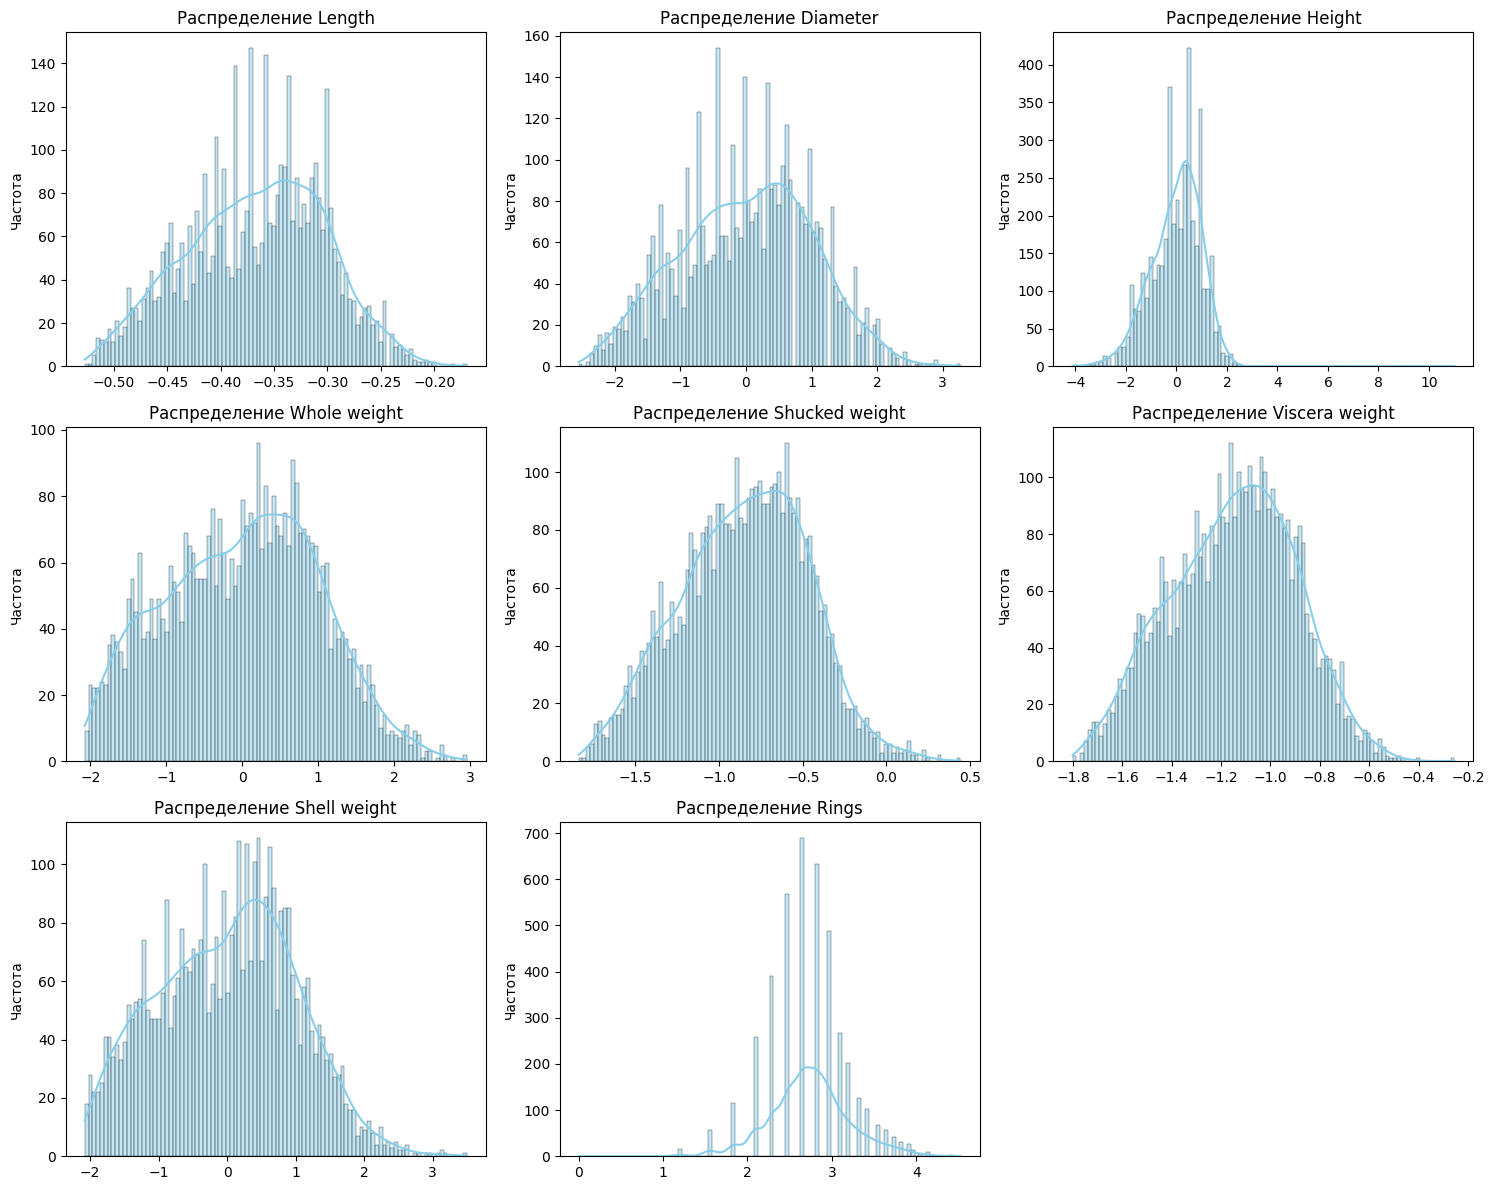

In [81]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Выбор числовых признаков
numeric_columns = df.select_dtypes(include=['number']).columns

# Преобразование данных к нормальному распределению
df_transformed = df.copy()
for col in numeric_columns:
    if (df[col] > 0).all():  # Box-Cox для положительных значений
        df_transformed[col], _ = boxcox(df[col] + 1e-6)
        print(f'Box-Cox применен к {col}')
    else:  # Yeo-Johnson для значений с нулями
        pt = PowerTransformer(method='yeo-johnson')
        df_transformed[col] = pt.fit_transform(df[[col]])
        print(f'Yeo-Johnson применен к {col}')

# Создание матрицы подграфиков
num_cols = len(numeric_columns)  # Количество признаков
rows = (num_cols + 2) // 3  # Количество строк (по 3 графика в строке)

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Матрица 3xN графиков
axes = axes.flatten()  # Разворачиваем массив осей для удобного итератора

# Построение гистограмм
for i, col in enumerate(numeric_columns):
    sns.histplot(df_transformed[col], kde=True, bins=100, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Частота')

# Удаляем пустые подграфики, если графиков меньше, чем ячеек
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Улучшаем компоновку графиков
plt.tight_layout()
plt.show()

# Вывод по графиком распределений после преобразования к нормальному распределению
* 75% - логнормальное распределение
* 25% - нормальное распределение

<h2>3. Построить матрицу корреляций</h2>

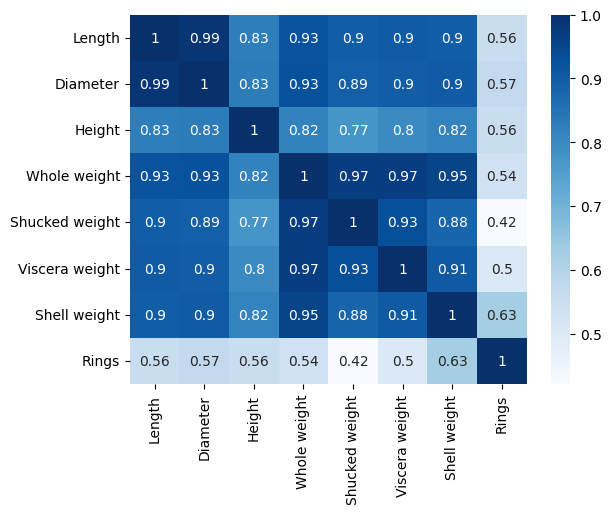

In [82]:
#корреляция Пирсона
corr_pirs = df.corr(numeric_only=True) # матрица корреляций
sns.heatmap(corr_pirs, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Пирсону
* Length, Diameter, Whole weight, Shucked weight, Viscera weight и Shell weight имеют коэффициенты корреляции выше 0.9 друг с другом. Это указывает на сильную линейную зависимость
* Умеренная связь между признаками и целевым значением Rings.

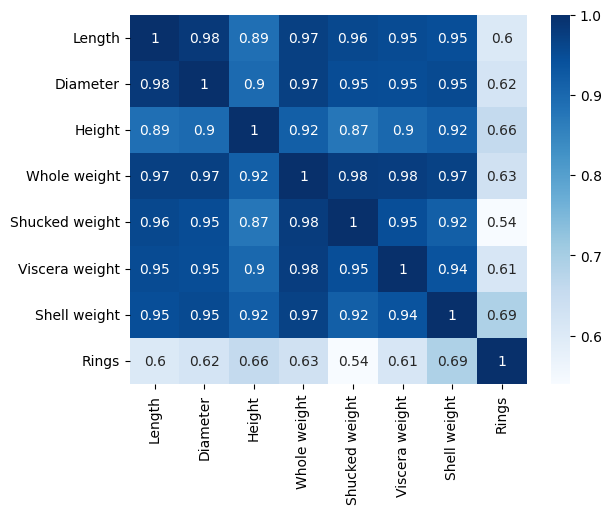

In [83]:
#Корреляция Спирмена
corr_spir = df.corr(method='spearman', numeric_only=True) # матрица корреляций
sns.heatmap(corr_spir, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Спирмену
* Корреляция Спирмена показала сильные монотонные связи между признаками.
* Целевой признак Rings наиболее коррелирует с Shell weight и Height, что можно использовать для построения модели.
* Высокая взаимозависимость между признаками требует сокращения размерности и обработки мультиколлинеарности

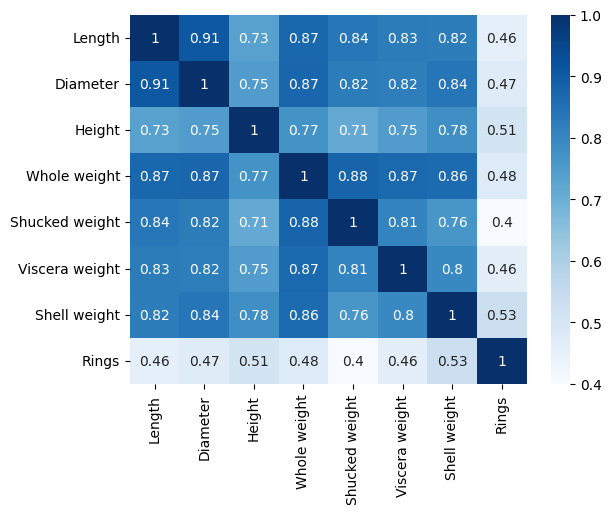

In [84]:
#Корреляция Кендалла
corr_kend = df.corr(method='kendall', numeric_only=True) # матрица корреляций
sns.heatmap(corr_kend, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Кендаллу
* Высокая связь между признаками, такими как Length, Diameter и Whole weight, указывает на потенциальную мультиколлинеарность.
* Целевой признак Rings имеет умеренную связь с Shell weight и Height.
* Рассмотреть Shell weight и Height как важные признаки для модели.

In [85]:
#построим V-меру Краммера для двух категоральных значений: Rings и Sex
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "int64" else x)

cramersv = am.CramersV(df_cat)
cramersv.fit()

,Sex,Rings
Sex,1.000000,0.386311
Rings,0.386311,1.000000


# Вывод по V-мере Краммера между Sex и Rings
* Между Sex и Rings наблюдается слабая связь
* Переменная Sex может быть полезной при моделировании Rings, но не ключевой.

In [86]:
#проведем ANOVA между категоральными и численными значениями
from scipy.stats import f_oneway

corr_object = []

for c1 in df_cat.select_dtypes(include=['category']):
    for c2 in df_cat.select_dtypes(include=['float']):
        category_group_lists = df_cat.groupby(c1, observed=True)[c2].apply(list)
        anova_results = f_oneway(*category_group_lists)

        if anova_results[1] >= 0.05:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'No'})
        else:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'Yes'})

anova_general_result = pd.DataFrame.from_dict(corr_object)
anova_general_result

,category,numerical,is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Rings,Length,Yes
8,Rings,Diameter,Yes
9,Rings,Height,Yes


# Вывод по ANOVA
* Sex влияет на числовые признаки, поэтому данную переменную можно использовать для анализа и моделирования как категориальный фактор.
* Все числовые признаки имеют значимую связь с целевой переменной Rings, что делает их полезными предикторами для построения модели машинного обучения.

In [87]:
# Удаляем строки из df, которые есть в tails_df
df_cleaned = df.drop(tails_df.index)

# Проверяем размер исходного и очищенного DataFrame
print(f"Размер исходного DataFrame: {df.shape}")
print(f"Размер очищенного DataFrame: {df_cleaned.shape}")

Размер исходного DataFrame: (4177, 9)
Размер очищенного DataFrame: (3781, 9)


In [88]:
# Проверка на отсутствие хвостов в df_cleaned
# Фильтруем только числовые столбцы из df
numeric_columns = df.select_dtypes(include=['number']).columns

# Проверка на отсутствие хвостов в df_cleaned
print("Остались ли хвосты в очищенном DataFrame?")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col}: {len(remaining_outliers)} выбросов осталось")


Остались ли хвосты в очищенном DataFrame?
Length: 0 выбросов осталось
Diameter: 0 выбросов осталось
Height: 0 выбросов осталось
Whole weight: 0 выбросов осталось
Shucked weight: 0 выбросов осталось
Viscera weight: 0 выбросов осталось
Shell weight: 0 выбросов осталось
Rings: 0 выбросов осталось


In [89]:
#поиск пропусков
df_cleaned.isnull().mean()

Sex               0.000000
Length            0.000000
Diameter          0.022745
Height            0.000000
Whole weight      0.023274
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      0.012166
Rings             0.000000
dtype: float64

In [90]:
# #тк количество пропусков меньше процента, я решила заменить пропуски медианой
# for cols in df:
#     if df[cols].isnull().sum() != 0:
#         median = df[cols].median()
#         df[cols].fillna(median, inplace=True)

In [91]:
# Целевая переменная
target = 'Rings'

# Заполнение пропусков медианой относительно целевого признака
for col in df_cleaned.select_dtypes(include=['number']).columns:
    if col != target and df_cleaned[col].isnull().sum() > 0:  # Только числовые столбцы с пропусками
        df_cleaned[col] = df_cleaned.groupby(target)[col].transform(lambda x: x.fillna(x.median()))
        print(f'Пропуски в {col} заполнены медианами по группам {target}')

Пропуски в Diameter заполнены медианами по группам Rings
Пропуски в Whole weight заполнены медианами по группам Rings
Пропуски в Shell weight заполнены медианами по группам Rings


In [92]:
#поиск пропусков
df_cleaned.isnull().mean()

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [93]:
df_cleaned_norm = df_transformed.drop(tails_df.index)

In [94]:
#поиск пропусков
df_cleaned_norm.isnull().mean()

Sex               0.000000
Length            0.000000
Diameter          0.022745
Height            0.000000
Whole weight      0.023274
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      0.012166
Rings             0.000000
dtype: float64

In [95]:
# Целевая переменная
target = 'Rings'

# Заполнение пропусков медианой относительно целевого признака
for col in df_cleaned_norm.select_dtypes(include=['number']).columns:
    if col != target and df_cleaned_norm[col].isnull().sum() > 0:  # Только числовые столбцы с пропусками
        df_cleaned_norm[col] = df_cleaned_norm.groupby(target)[col].transform(lambda x: x.fillna(x.median()))
        print(f'Пропуски в {col} заполнены медианами по группам {target}')

Пропуски в Diameter заполнены медианами по группам Rings
Пропуски в Whole weight заполнены медианами по группам Rings
Пропуски в Shell weight заполнены медианами по группам Rings


In [96]:
df_cleaned_norm.isnull().mean()

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [97]:
zero_percentage = (df_cleaned == 0).sum() / len(df_cleaned) * 100

# Вывод результатов
print("Доля нулевых значений в процентах для каждого столбца:")
print(zero_percentage)

Доля нулевых значений в процентах для каждого столбца:
Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64


In [98]:
# #height равных нулю меньше нуля, удалю их
# df_cleaned = df_cleaned[df_cleaned['Height'] > 0]

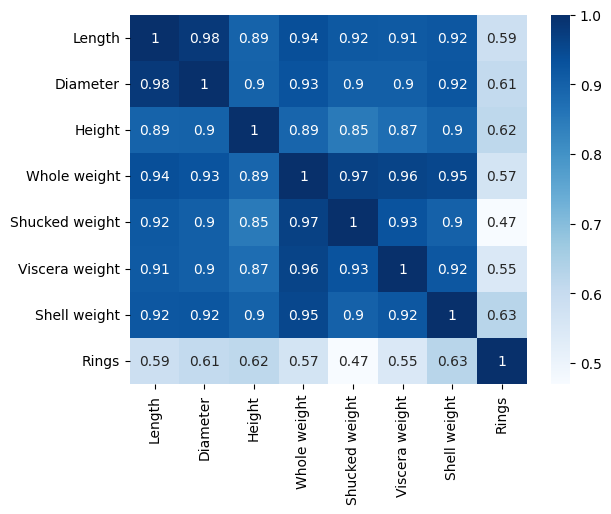

In [99]:
#корреляция Пирсона
corr_pirs = df_cleaned.corr(numeric_only=True) # матрица корреляций
sns.heatmap(corr_pirs, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Пирсону после обработки
1. Удаление выбросов и заполнение пропусков медианами улучшили надежность корреляционных оценок:
* Это привело к увеличению корреляций между целевым признаком Rings и другими числовыми признаками.
2. Самые влиятельные признаки для Rings:
* Shell weight (0.63)
* Height (0.62)
* Diameter (0.61)
3. Высокая корреляция между другими признаками (например, Whole weight и Length, Shucked weight, Viscera weight) осталась неизменной и свидетельствует о мультиколлинеарности.

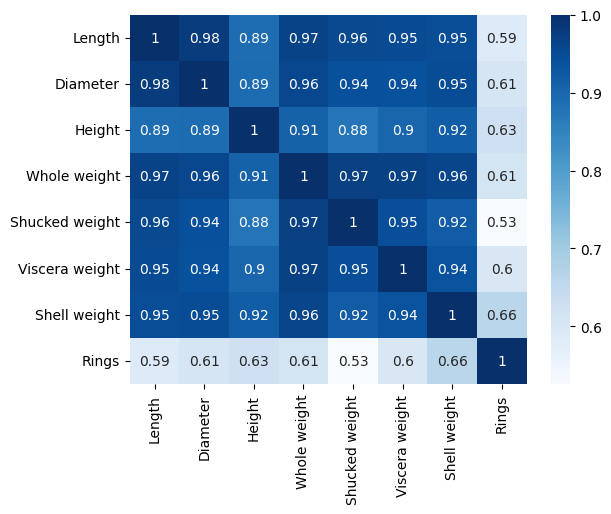

In [100]:
#Корреляция Спирмена
corr_spir = df_cleaned.corr(method='spearman', numeric_only=True) # матрица корреляций
sns.heatmap(corr_spir, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Спирмену после обработки
1. Корреляции усилились:
* Удаление выбросов и заполнение пропусков медианой привело к стабилизации зависимостей между признаками.
* Корреляции между Length, Diameter, Whole weight и Shell weight стали более надежными.
2. Целевой признак (Rings):
* Корреляция с целевым признаком улучшилась, особенно для Shell weight и Height, что говорит об их большем влиянии на Rings.
3. Влияние обработки данных:
* Обработка данных позволила уменьшить шум и улучшить качество корреляционных связей в наборе данных.

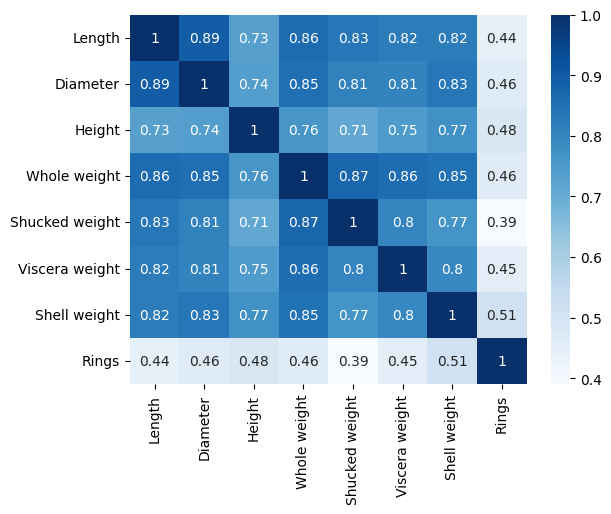

In [101]:
#Корреляция Кендалла
corr_kend = df_cleaned.corr(method='kendall', numeric_only=True) # матрица корреляций
sns.heatmap(corr_kend, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Кендаллу после обработки
* Корреляции Кендалла снизились после обработки данных.
* Выбросы и нулевые значения оказывали влияние на зависимости между признаками.
* Снижение корреляции с целевым признаком указывает на более чистые данные, но возможно, также на более слабую связь после обработки.

# Итоговый вывод
В целом, данные подходят для машинного обучения

# Часть 2: ОБУЧЕНИЕ

1. Построение моделей на числовых признаках (минимум - NB и kNN, максимум - любые) с параметрами по умолчанию, вычисление метрик + комментарий о качестве моделей (1 балл).
2. Подбор гиперпараметров у каждой из моделей (только на числовых признаках) при помощи GridSearchCV + вычисление метрик для лучших найденных моделей + текстовый комментарий (3 балла).
3. Добавление категориальных признаков в лучшую модель, обучение модели и заново подбор ее гиперпараметров + вычисление метрик + текстовый комментарий (2 балла).
4. Построение Explainer Dashboard и сохранение файла с ним на GitHub (1 балл)
5. Анализ модели в Explainer Dashboard (выводы пишем в том же Jupyter Notebook):
* какие факторы наиболее важны в среднем для получения прогноза? (1 балл)
* какие значения метрик получились и что это значит? (1 балл)
* анализ 2-3 индивидуальных прогнозов с комментарием (1 балл)

In [102]:
from sklearn.exceptions import FitFailedWarning

# Отключение FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [103]:
df_cleaned.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.51400,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.22550,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.67700,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,1.01125,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.20500,0.0895,0.0395,0.055,7


In [104]:
df_cleaned['Rings'] = df_cleaned['Rings'].astype(float)

In [105]:
df_cleaned_norm.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.410616,-0.548449,-1.124512,-0.573241,-1.032279,-1.307483,-0.591502,3.426928
1,M,-0.457649,-1.386447,-1.264396,-1.347506,-1.331980,-1.480271,-1.337791,2.300617
2,F,-0.370467,0.009597,-0.064823,-0.194895,-0.969687,-1.201645,-0.100829,2.656242
3,M,-0.417995,-0.548449,-0.320227,0.483881,-1.050628,-1.271700,-0.548527,2.809846
4,I,-0.465370,-1.458889,-1.549424,-1.408829,-1.362329,-1.517456,-1.491239,2.300617


In [106]:
x = df_cleaned.drop(labels=['Rings'], axis=1)
x_norm = df_cleaned_norm.drop(labels=['Rings'], axis=1)
y = df_cleaned['Rings']
y_norm = df_cleaned_norm['Rings']

In [107]:
y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 3781, dtype: float64

In [108]:
y_norm

0       3.426928
1       2.300617
2       2.656242
3       2.809846
4       2.300617
          ...   
4172    2.951154
4173    2.809846
4174    2.656242
4175    2.809846
4176    3.082143
Name: Rings, Length: 3781, dtype: float64

In [109]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3781 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             3781 non-null   category
 1   Length          3781 non-null   float64 
 2   Diameter        3781 non-null   float64 
 3   Height          3781 non-null   float64 
 4   Whole weight    3781 non-null   float64 
 5   Shucked weight  3781 non-null   float64 
 6   Viscera weight  3781 non-null   float64 
 7   Shell weight    3781 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 240.1 KB


In [110]:
x_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3781 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             3781 non-null   category
 1   Length          3781 non-null   float64 
 2   Diameter        3781 non-null   float64 
 3   Height          3781 non-null   float64 
 4   Whole weight    3781 non-null   float64 
 5   Shucked weight  3781 non-null   float64 
 6   Viscera weight  3781 non-null   float64 
 7   Shell weight    3781 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 240.1 KB


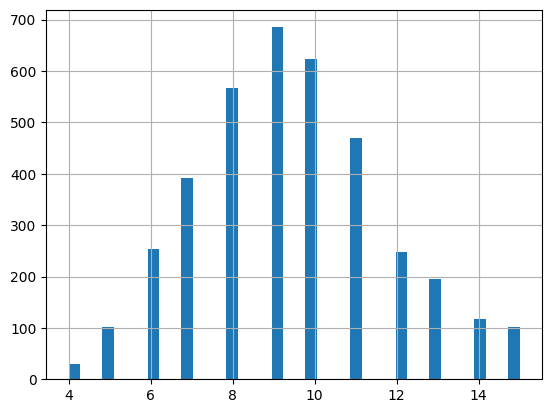

In [111]:
y.hist(bins=40);

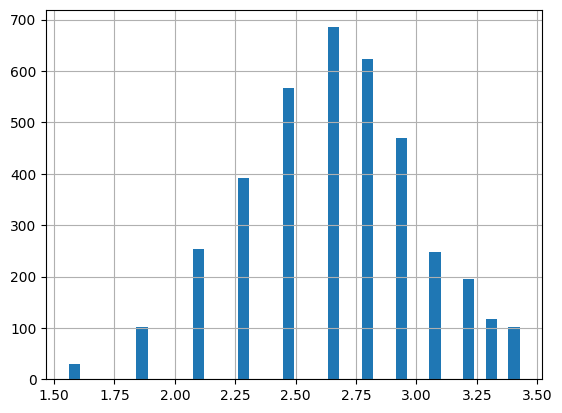

In [124]:
y_norm.hist(bins=40);

In [112]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# import pandas as pd

# class MLPipeline:
#     def __init__(self, dataset, target_column):
#         """
#         Инициализация класса.

#         :param dataset: pandas DataFrame, содержащий данные
#         :param target_column: название целевой переменной
#         """
#         self.dataset = dataset
#         self.target_column = target_column
#         self.X = dataset.drop(columns=[target_column])
#         self.y = dataset[target_column]
#         self.pipeline = None
#         self.column_transformer = None

#     def create_column_transformer(self, numeric_features, categorical_features):
#         """
#         Создает ColumnTransformer для обработки числовых и категориальных данных.

#         :param numeric_features: список названий числовых столбцов
#         :param categorical_features: список названий категориальных столбцов
#         """
#         # Проверка существования столбцов в наборе данных
#         missing_numeric = [col for col in numeric_features if col not in self.X.columns]
#         missing_categorical = [col for col in categorical_features if col not in self.X.columns]

#         if missing_numeric:
#             raise ValueError(f"Следующие числовые столбцы отсутствуют в данных: {missing_numeric}")
#         if missing_categorical:
#             raise ValueError(f"Следующие категориальные столбцы отсутствуют в данных: {missing_categorical}")

#         numeric_transformer = Pipeline(steps=[
#             ('scaler', StandardScaler())
#         ])

#         categorical_transformer = Pipeline(steps=[
#             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#         ])

#         self.column_transformer = ColumnTransformer(
#             transformers=[
#                 ('num', numeric_transformer, numeric_features),
#                 ('cat', categorical_transformer, categorical_features)
#             ]
#         )

#     def build_pipeline(self, model):
#         """
#         Создает пайплайн, объединяя ColumnTransformer и модель.

#         :param model: модель машинного обучения (например, объект из scikit-learn)
#         """
#         if not self.column_transformer:
#             raise ValueError("ColumnTransformer не создан. Вызовите create_column_transformer сначала.")

#         self.pipeline = Pipeline(steps=[
#             ('preprocessor', self.column_transformer),
#             ('model', model)
#         ])

#     def train_pipeline(self):
#         """
#         Обучает пайплайн на данных.
#         """
#         if not self.pipeline:
#             raise ValueError("Пайплайн не создан. Вызовите build_pipeline сначала.")

#         self.pipeline.fit(self.X, self.y)

#     def grid_search(self, param_grid, cv=5, scoring='accuracy', verbose=1):
#         """
#         Выполняет GridSearchCV для поиска лучших гиперпараметров.

#         :param param_grid: словарь параметров для подбора
#         :param cv: количество фолдов для кросс-валидации
#         :param scoring: метрика для оценки (по умолчанию 'accuracy')
#         :param verbose: уровень вывода информации
#         :return: объект GridSearchCV
#         """
#         if not self.pipeline:
#             raise ValueError("Пайплайн не создан. Вызовите build_pipeline сначала.")

#         grid_search = GridSearchCV(
#             self.pipeline,
#             param_grid=param_grid,
#             cv=cv,
#             scoring=scoring,
#             verbose=verbose
#         )
#         grid_search.fit(self.X, self.y)
#         return grid_search


In [113]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler

In [114]:
class MLPipeline:
    def __init__(self, dataset, target_column, test_size=0.25, random_state=42):
        """
        Инициализация класса.

        :param dataset: pandas DataFrame, содержащий данные
        :param target_column: название целевой переменной
        """
        self.dataset = dataset
        self.target_column = target_column
        self.X = dataset.drop(columns=[target_column])
        self.y = dataset[target_column]
        self.pipelines = []
        self.column_transformer = None
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )
        
        
    def create_column_transformer(self, numeric_features, categorical_features,
                                general_numeric_scaler=MinMaxScaler(),
                                specific_numeric_scalers=None,
                                general_categorical_encoder=OneHotEncoder(handle_unknown='ignore'),
                                specific_categorical_encoders=None):
        """
        Создает ColumnTransformer для обработки числовых и категориальных данных.

        :param numeric_features: список названий числовых столбцов
        :param categorical_features: список названий категориальных столбцов
        :param general_numeric_scaler: трансформер для большинства числовых столбцов (например, StandardScaler)
        :param specific_numeric_scalers: словарь {столбец: трансформер} для конкретных числовых столбцов
        :param general_categorical_encoder: трансформер для большинства категориальных столбцов
        :param specific_categorical_encoders: словарь {столбец: трансформер} для конкретных категориальных столбцов
        """
        # Проверка существования столбцов в наборе данных
        missing_numeric = [col for col in numeric_features if col not in self.X.columns]
        missing_categorical = [col for col in categorical_features if col not in self.X.columns]

        if missing_numeric:
            raise ValueError(f"Следующие числовые столбцы отсутствуют в данных: {missing_numeric}")
        if missing_categorical:
            raise ValueError(f"Следующие категориальные столбцы отсутствуют в данных: {missing_categorical}")

        # Разделение числовых столбцов
        specific_numeric_columns = set(specific_numeric_scalers.keys()) if specific_numeric_scalers else set()
        general_numeric_columns = [col for col in numeric_features if col not in specific_numeric_columns]

        # Разделение категориальных столбцов
        specific_categorical_columns = set(specific_categorical_encoders.keys()) if specific_categorical_encoders else set()
        general_categorical_columns = [col for col in categorical_features if col not in specific_categorical_columns]

        # Создание трансформеров для числовых столбцов
        numeric_transformers = []

        # Общий трансформер для большинства числовых столбцов
        if general_numeric_columns:
            numeric_transformers.append(
                ('num_general', Pipeline(steps=[('scaler', general_numeric_scaler)]), general_numeric_columns)
            )

        # Специфические трансформеры для отдельных числовых столбцов
        if specific_numeric_scalers:
            for col, scaler in specific_numeric_scalers.items():
                numeric_transformers.append(
                    (f"num_{col}", Pipeline(steps=[('scaler', scaler)]), [col])
                )

        # Создание трансформеров для категориальных столбцов
        categorical_transformers = []

        # Общий трансформер для большинства категориальных столбцов
        if general_categorical_columns:
            categorical_transformers.append(
                ('cat_general', Pipeline(steps=[('encoder', general_categorical_encoder)]), general_categorical_columns)
            )

        # Специфические трансформеры для отдельных категориальных столбцов
        if specific_categorical_encoders:
            for col, encoder in specific_categorical_encoders.items():
                categorical_transformers.append(
                    (f"cat_{col}", Pipeline(steps=[('encoder', encoder)]), [col])
                )

        # Итоговый ColumnTransformer
        self.column_transformer = ColumnTransformer(
            transformers=numeric_transformers + categorical_transformers
        )

    def build_pipeline(self, models):
        """
        Создает пайплайны для каждой переданной модели, объединяя ColumnTransformer и модель.

        :param models: список моделей машинного обучения (например, объекты из scikit-learn)
        """
        if not self.column_transformer:
            raise ValueError("ColumnTransformer не создан. Вызовите create_column_transformer сначала.")

        self.pipelines = [
            Pipeline(steps=[
                ('preprocessor', self.column_transformer),
                ('model', model)
            ])
            for model in models
        ]

    def train_pipelines(self):
        """
        Обучает каждый пайплайн на данных.

        :return: список обученных пайплайнов
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Вызовите build_pipeline сначала.")

        for pipeline in self.pipelines:
            pipeline.fit(self.X_train, self.y_train)

        return self.pipelines

    def evaluate_pipelines(self):
        """
        Оценивает производительность каждого пайплайна на тестовых данных.

        :return: список словарей с метриками для каждого пайплайна
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Обучите их перед оценкой.")

        scores = [pipeline.score(self.X_test, self.y_test) for pipeline in self.pipelines]
        return [{"pipeline_index": i, "test_score": score} for i, score in enumerate(scores)]

    def cross_validate_pipelines(self, scoring, cv=4, n_jobs=-1):
        """
        Выполняет кросс-валидацию для всех пайплайнов по заданным метрикам.

        :param scoring: метрики для оценки (может быть строкой, списком или словарём)
        :param cv: количество фолдов для кросс-валидации (по умолчанию 4)
        :param n_jobs: количество процессов для выполнения (-1 для использования всех ядер)
        :return: список результатов кросс-валидации для каждого пайплайна
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Вызовите build_pipeline сначала.")

        cv_results = []
        for i, pipeline in enumerate(self.pipelines):
            results = cross_validate(
                pipeline, self.X, self.y, scoring=scoring, cv=cv, return_train_score=True, n_jobs=n_jobs
            )
            cv_results.append({"pipeline_index": i, "cv_results": results})

        return cv_results

    def grid_search(self, param_grids, cv=5, scoring='accuracy', verbose=1, save_results_to=None):
        """
        Выполняет GridSearchCV для каждой модели в пайплайнах.

        :param param_grids: список словарей параметров для подбора, по одному на каждую модель
        :param cv: количество фолдов для кросс-валидации
        :param scoring: метрика для оценки (по умолчанию 'accuracy')
        :param verbose: уровень вывода информации
        :param save_results_to: путь для сохранения результатов (файл или DataFrame)
        :return: список объектов GridSearchCV
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Вызовите build_pipeline сначала.")

        if len(self.pipelines) != len(param_grids):
            raise ValueError("Количество параметров в param_grids должно соответствовать количеству моделей в пайплайнах.")

        grid_searches = []
        for i, (pipeline, param_grid) in enumerate(zip(self.pipelines, param_grids)):
            grid_search = GridSearchCV(
                pipeline,
                param_grid=param_grid,
                cv=cv,
                scoring=scoring,
                verbose=verbose
            )
            grid_search.fit(self.X_train, self.y_train)
            grid_searches.append(grid_search)

            if save_results_to:
                results = pd.DataFrame(grid_search.cv_results_)
                save_path = f"{save_results_to}_pipeline_{i}.csv" if isinstance(save_results_to, str) else None
                if save_path:
                    results.to_csv(save_path, index=False)

        return grid_searches


In [115]:
# Инициализация класса с вашим датасетом df_cleaned
df_cleaned_ml = MLPipeline(df_cleaned, target_column='Rings')
df_norm_cleaned_ml = MLPipeline(df_cleaned_norm, target_column='Rings')
qw=MLPipeline


models = [
    KNeighborsRegressor(),
    LinearRegression(),
    # CatBoostRegressor(verbose=0),
    # GradientBoostingRegressor()
]



In [116]:
df_cleaned_ml.create_column_transformer(
    numeric_features=x.drop(labels=['Sex'], axis=1).columns,
    categorical_features=['Sex'],
)

df_norm_cleaned_ml.create_column_transformer(
    numeric_features=x_norm.drop(labels=['Sex'], axis=1).columns,
    categorical_features=['Sex'],
)

In [117]:
df_cleaned_ml.build_pipeline(models=models)
df_cleaned_ml.train_pipelines()
evaluation_results = df_cleaned_ml.evaluate_pipelines()

for result in evaluation_results:
    print(f"Pipeline {result['pipeline_index']}: Test Score = {result['test_score']}")
    
    
    
df_norm_cleaned_ml.build_pipeline(models=models)
df_norm_cleaned_ml.train_pipelines()
evaluation_results = df_norm_cleaned_ml.evaluate_pipelines()

for result in evaluation_results:
    print(f"Pipeline {result['pipeline_index']}: Test Score = {result['test_score']}")

Pipeline 0: Test Score = 0.5025665128251049
Pipeline 1: Test Score = 0.5475648553070511
Pipeline 0: Test Score = 0.5374604479674263
Pipeline 1: Test Score = 0.5536863493043152


In [118]:
from sklearn.model_selection import cross_validate
# перечисляем список метрик для задачи регрессии
scoring = [
    'neg_mean_squared_error',             # MSE
    'neg_root_mean_squared_error',        # RMSE
    'neg_mean_absolute_error',            # MAE
    'neg_median_absolute_error',          # MedAE
    'r2',                                 # R²
    'neg_mean_absolute_percentage_error', # MAPE
    'explained_variance'                  # Explained Variance
]

from sklearn.model_selection import cross_validate
import pandas as pd


cv_cleaned = df_cleaned_ml.cross_validate_pipelines(scoring=scoring, cv=4, n_jobs=-1)
cv_norm_cleaned = df_norm_cleaned_ml.cross_validate_pipelines(scoring=scoring, cv=4, n_jobs=-1)

In [129]:
def convert_cv_results_to_dataframe(cv_results_list, metrics, pipeline_names=None):
    """
    Преобразует список результатов кросс-валидации в DataFrame с именами пайплайнов.

    Args:
        cv_results_list: Список результатов кросс-валидации. Каждый элемент - словарь с pipeline_index и cv_results.
        metrics: Список метрик для извлечения (например, 'test_r2', 'test_neg_mean_squared_error').
        pipeline_names: Список имен пайплайнов (если None, будет использоваться индекс).

    Returns:
        DataFrame, где строки - пайплайны, а столбцы - средние значения метрик.
    """
    rows = []
    for result in cv_results_list:
        pipeline_index = result['pipeline_index']
        cv_results = result['cv_results']
        
        # Рассчитываем средние значения метрик
        avg_metrics = {metric: cv_results[metric].mean() for metric in metrics}
        avg_metrics['model'] = pipeline_names[pipeline_index] if pipeline_names else f"Pipeline_{pipeline_index}"
        rows.append(avg_metrics)
    
    # Создаем DataFrame из списка
    return pd.DataFrame(rows)


metrics = ['test_r2', 'test_neg_mean_squared_error', 'train_r2']

tb = convert_cv_results_to_dataframe(cv_cleaned, metrics)
tb_norm = convert_cv_results_to_dataframe(cv_norm_cleaned, metrics)


In [130]:
tb

,test_r2,test_neg_mean_squared_error,train_r2,model
0,0.431507,-3.002370,0.650182,Pipeline_0
1,0.471718,-2.770168,0.516155,Pipeline_1


In [131]:
tb_norm

,test_r2,test_neg_mean_squared_error,train_r2,model
0,0.501135,-0.066979,0.685781,Pipeline_0
1,0.507142,-0.066245,0.534759,Pipeline_1


In [121]:
# cv_cleaned

In [138]:
param_grids = [
    {
        'model__n_neighbors': np.arange(2, 20, 2),
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {
        'model__fit_intercept': [True, False],  # Включение/выключение перехвата
        'model__n_jobs': [None, -1]  # Количество потоков для вычислений
    },
    # {
    #     'model__learning_rate': [0.01, 0.1, 0.2],
    #     'model__depth': [4, 6, 8],
    #     'model__iterations': [100, 300, 500]
    # },
    # {
    #     'model__n_estimators': [1, 50, 100, 200, 300],
    #     'model__max_depth': [3, 4, 5],
    #     'model__learning_rate': [0.1, 0.01, 0.001]
    # }
]

grid_search_results = df_cleaned_ml.grid_search(param_grids=param_grids, save_results_to='2222')
for i, gs in enumerate(grid_search_results):
    print(f"Best parameters for pipeline {i}: {gs.best_params_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for pipeline 0: {'model__n_neighbors': 2, 'model__p': 1, 'model__weights': 'uniform'}
Best parameters for pipeline 1: {'model__fit_intercept': True, 'model__n_jobs': None}


In [137]:
grid_search_norm_results = df_norm_cleaned_ml.grid_search(param_grids=param_grids, save_results_to='1111')
for i, gs in enumerate(grid_search_norm_results):
    print(f"Best parameters for pipeline {i}: {gs.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for pipeline 0: {'model__n_neighbors': 2, 'model__p': 1, 'model__weights': 'uniform'}
Best parameters for pipeline 1: {'model__fit_intercept': True, 'model__n_jobs': None}


In [135]:
grid_search_results[0].best_params_

{'model__n_neighbors': 2, 'model__p': 1, 'model__weights': 'uniform'}